## Reinforcement Learning 3: *Dynamic Programming*

This week's workgroups contain some demonstrations, along with hand-written and programming exercises for you to
complete. Note that the written exercises are of similar difficulty as those you will encounter in the exam, so use
this opportunity to exercise and clarify your doubts with the course's TAs.
Solutions to the exercises will be provided after the practicals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table

from IPython.display import Image
from IPython.core.display import HTML 


## Refreshing your memory: elements from the previous lectures
We use a Markov Decision Process (MDP) to formulize a RL problem, which is described by the tuple 
$$\mathcal{M}=\langle\mathcal{S},  {\mathcal{A}}, \mathcal{P}, \mathcal{R},\gamma\rangle,$$
where $\mathcal S$ is the state space, $\mathcal A$ is the action space, and $\mathcal R$ is the reward space. In this course, we assume that $\mathcal S, \mathcal A, \mathcal R$ are all finite sets. Here, $\mathcal{P}$ defines the dynamics of the MDP, characterizing the state-transition probabilities and reward-generating probabilities. $\gamma\in[0,1]$ is the discount factor that trades off later rewards to earlier ones

### **Value functions**: total amount of reward an agent can expect to accumulate over the future, starting from that state/state-action pair.

`State value funcitons:` (expected return, when stating in $s$ and following policy $\pi$)
$$v_{\pi}(s) = \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s\right].$$
`(State-)Action value funcitons:` (expected return, when stating in $s$, taking action $a$ and following policy $\pi$)
$$q_{\pi}(s, a) = \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s, A_{t}=a\right].$$

### **Bellman equations**
`For state value:` (connecting the value of a state $s$ to the value of the successor states $s'$ and immediate rewards $r$)
\begin{align}
v(s) &\doteq \mathbb{E}\left[G_{t} \mid S_{t}=s\right]\nonumber\\
&=\mathbb{E}\left[R_{t+1}+\gamma G_{t+1} \mid S_{t}=s\right]\nonumber\\
&{\color{red}=\sum\limits_{a} \pi(a \mid s) \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right]}, \quad \text { for all } s \in \mathcal{S} 
\end{align}

`For action value:` (connecting the value of a state-action pair $(s,a)$ to the value of the successor state-action pairs $(s', a')$ and immediate rewards $r$)
\begin{align*}
q_{\pi}(s, a) &\doteq \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]\\
& = \mathbb{E}_{\pi}\left[R_{t+1}+\gamma G_{t+1} \mid S_{t}=s, A_{t}=a\right]\\
& \color{red}=\sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \sum\limits_{a'} \pi(a'\mid s')q_{\pi}(s', a')\right], \quad \text { for all } s \in \mathcal{S}, a \in \mathcal{A}
\end{align*}
`Connections between state and action value functions:` 
\begin{align*}
v_{\pi}(s)&=\mathbb{E}_{\pi}[q_{\pi}(s,a)]=\sum\limits_{a \in \mathcal{A}} \pi(a \mid s) \ \  q_{\pi}(s, a)
\end{align*}

and
\begin{align*}
q_{\pi}(s,a)&=\mathbb{E}[R_{t+1}+\gamma v_{\pi}(S_{t+1}) \mid S_{t}=s,A_{t}=a]\\
&=\sum\limits_{s',r} p(s',r \mid s,a) [r+\gamma v_{\pi}(s')]
\end{align*}
***Note:*** *The relations above can be useful when evaluating the value function of a policy.*

### **Bellman optimality equations**
There exists a policy that is better than or equal to all other policies. This policy is called an ***optimal policy***.  There can be more than one optimal policies, and we denote them as $\pi_*$. They share the same value function, which we call optimal state value function and state-action value function, respectively defined as 
\begin{align*}
&v_*(s)=\max_\pi v_\pi(s), \text{ for all } s \in \mathcal S;\\
& q_*(s,a) =\max_\pi q_\pi(s,a), \text{ for all } s \in \mathcal S, a \in \mathcal A.
\end{align*}


`For state value,` the Bellman optimality equation read as $$v_{*}(s)=\max \limits_{a} \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{*}\left(s^{\prime}\right)\right].$$
Intuitively, the Bellman optimality equation expresses the fact that the value of a state under an optimal policy must equal the expected return for the best action from that state.


`For action value,` the Bellman optimality equation read as
\begin{align*}
q_{*}(s,a)=\sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \max\limits _{a^{\prime}} q_{*}\left(s^{\prime}, a^{\prime}\right)\right]
\end{align*}

### **Policy  evaluation**

Given a policy $\pi$, to evaluate the value function, we can use the Bellman equation in `Eq.(1)` iteratively:

\begin{align*}
v_{\color{red}k+1}({\color{blue}s}) &= \mathbb{E}_{\pi}\left[R_{t+1}+\gamma v_{\color{red}k}\left(S_{t+1}\right) \mid S_{t}=s\right]\\
&=\sum\limits_{a} \pi(a \mid s) \sum\limits_{{\color{blue}s'}, r} p\left({\color{blue}s'}, r \mid s, a\right)\left[r+\gamma v_{\color{red} k}\left({\color{blue}s'}\right)\right]
\end{align*}
where $k=0,1,2, \dots$ As $k\to \infty$, $v_{k}$ will converge to the true value of $\pi$.

### **Policy  improvement**
Once the value of a policy has been well evaluated, we can improve it in this way: at all states, we select at each state the action that appears best according to $q_\pi(s,a)$. That is, consider the new greedy policy $\pi'$ given by
\begin{align*}
\pi^{\prime}(s) &\doteq \underset{a}{\arg \max } \ \ q_{\pi}(s, a)\\
&=\underset{a}{\arg \max } \  \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right].
\end{align*}

**Policy iteration:** *By alternating between policy evaluation and policy improvement, one can find the optimal policy.*

Check the slides and the textbook for `value interation` and `asynchronous dynamical programming`.

---
## 1. Grid World

Recall the GridWorld example covered in the course lecture:

![Grid World](https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/Lec3-grid-world.png "Grid World Example")


**References:**
- Sutton & Barto, Ch.4, p. 76 (example 4.1)


In [2]:
# Let's define the GridWorld MDP
class GridWorld:
    # example 1 in DP
    def __init__(self, grid_size, actions):
        self.grid_size = grid_size
        self.actions = actions

    def is_terminal(self, state):
        x, y = state
        return (x == 0 and y == 0) or (x == self.grid_size - 1 and y == self.grid_size - 1)

    def step(self, state, action):
        if self.is_terminal(state):
            return state, 0
        next_state = (np.array(state) + action).tolist()
        x, y = next_state
        if x < 0 or x >= self.grid_size or y < 0 or y >= self.grid_size:
            next_state = state
        reward = -1
        return next_state, reward

    @staticmethod
    def draw(image):
        fig, ax = plt.subplots()
        ax.set_axis_off()
        tb = Table(ax, bbox=[0, 0, 1, 1])

        nrows, ncols = image.shape
        width, height = 1.0 / ncols, 1.0 / nrows

        # Add cells
        for (i, j), val in np.ndenumerate(image):
            tb.add_cell(i, j, width, height, text=val,
                        loc='center', facecolor='white')

            # Row and column labels...
        for i in range(len(image)):
            tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                        edgecolor='none', facecolor='none')
            tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                        edgecolor='none', facecolor='none')
        ax.add_table(tb)

    def compute_state_value(self, action_prob, in_place=True, discount=1.0):
        new_state_values = np.zeros((self.grid_size, self.grid_size))
        iteration = 0
        while True:
            if in_place:
                state_values = new_state_values
            else:
                state_values = new_state_values.copy()
            old_state_values = state_values.copy()

            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    value = 0
                    for action in self.actions:
                        (next_i, next_j), reward = self.step([i, j], action)
                        value += action_prob * (reward + discount * state_values[next_i, next_j])
                    new_state_values[i, j] = value
            max_delta_value = abs(old_state_values - new_state_values).max()
            if max_delta_value < 1e-4:
                break
            iteration += 1
        return new_state_values, iteration

In [3]:
grid_size = 4
# left, up, right, down
actions = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
policy = 0.25

# instantiate the GridWorld
gw = GridWorld(grid_size=grid_size, actions=actions)

**a**) Evaluate the state-value function, using synchronous and asynchronous (in-place) updates. How many iterations do the algorithms take to converge?

***Note:*** This part just helps you understand the difference between synchronous and asynchronous algorithms.

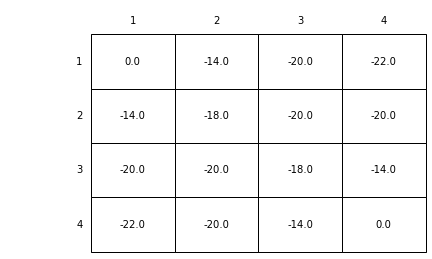

In [4]:
async_values, async_iteration = gw.compute_state_value(action_prob=policy, in_place=True)
gw.draw(np.round(async_values, 2))

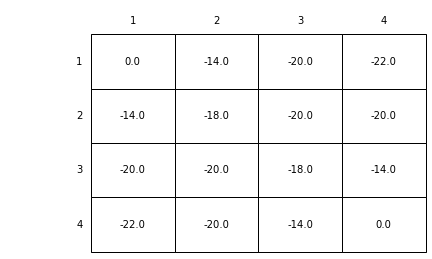

In [5]:
sync_values, sync_iteration = gw.compute_state_value(action_prob=policy, in_place=False)
gw.draw(np.round(sync_values, 2))

In [6]:
print('In-place: {} iterations'.format(async_iteration))
print('Synchronous: {} iterations'.format(sync_iteration))

In-place: 113 iterations
Synchronous: 172 iterations


## **b**) **Pen+Paper exercises** (in all exercises below, assume $\gamma=1$).

**b.1**) If the initial policy $\pi$ is the equiprobable random policy, i.e. $\pi(a\mid s)=0.25,
\forall a
\in \mathcal{A}, s\in\mathcal{S}$, calculate the value of being in state 11 and taking action $\texttt{down}$, $q_{\pi}
(11, \texttt{down})$.

**b.2**) What is the value of being in state 7 and taking action $\texttt{down}$?

**b.3**) Suppose a new state is added to the gridworld below state 13 and the actions that can be taken from that
state are the same as from any other state and take the agent to: $a = \texttt{up} \rightarrow s'=13$, $a =
\texttt{left} \rightarrow
s'=12$, $a = \texttt{right} \rightarrow s'=14$, $a = \texttt{down} \rightarrow s'=15$. Assume that all transitions from the
original states are unchanged. What is $v_{\pi}(15)$ for the equiprobable random policy?

**b.4**) Now suppose the dynamics for state 13 are also changed by the existence of the new state 15. Now, being in
state 13 and moving $\texttt{down}$ takes the agent to state 15. What is the value of state 15, $v_{\pi}(15)?

**b.5**) Under the changes done in b.4, what is the value of state 13, $v_{\pi}(13)$?

**c**) **Challenge** Re-implement the GridWorld as a `gym` environment and perform synchronous and asynchronous value iteration. If you feel adventurous, you can try to add proper rendering to show the position of the agent in the grid-world. 

***Note:*** This is optional and will not be graded.

---
## 2. Jack's car rental

Jack manages two rental car locations as part of a nationwide car rental company. The two locations have varying levels of demand (car rentals per day) and return rate. Since one of the locations has more demand than return rates, Jack can move cars overnight from one location to the other. To run a profitable business, Jack needs to make sure he has enough cars at each lot to maximize the total return.

The problem is then: how many cars should Jack move from one location to the other, given that each location has a limited capacity of 20 cars? Additionally, we want to determine the return: how much is Jack expected to earn from his business?

**Problem summary:**
<img alt="Grid world MDP" height="400" src="https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/CarRental.png" title="Grid World" width="600"/>

**Note:** The time step for this problem corresponds to a day, the *state* is the number of cars at each location at the end of the day and the *actions* are the net number of cars moved between the two locations overnight. From the number of cars at each location, we can determine the expected return, which, in this case, is influenced by a Poisson random distribution (which we use to weight the possible returns). We will be using a discounting factor $\gamma=0.9$.

**References:**
- Sutton & Barto, Ch.4, p. 81 (example 4.2)
- David Silver RL lectures: [Lecture 3](https://www.davidsilver.uk/wp-content/uploads/2020/03/DP.pdf)
- [Explained example](https://medium.com/@jaems33/this-is-start-of-my-exploration-into-learning-about-reinforcement-learning-d505a68a2d6)


In [7]:
# parameters
max_cars = 20 # maximum # of cars in each location
max_move = 5  # maximum # of cars to move overnight
requests_loc1 = 3 # expectation for rental requests in first location
returns_loc1 = 3 # expectation for # of cars returned in 1st location
requests_loc2 = 4 # expectation for rental requests in second location
returns_loc2 = 2 # expectation for # of cars returned in 2nd location

discount = 0.9

reward = 10 # credit earned by renting a car
move_cost = 2 # cost of moving a car

# states (# cars in loc1, # cars in loc2)
states = []
for i in range(max_cars+1):
    for j in range(max_cars+1):
        states.append([i, j])

# action space (how many cars to move from loc1->loc2 (>0) or from loc2->loc1 (<0))
actions = np.arange(-max_move, max_move + 1)

print(f"States: {states}")
print(f"Actions: {actions}")

States: [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11]

Note that the problem refers the average number of events (car requests and returns, which directly change the state), but the precise value at any given point in time is a Poisson-distributed random variable. With this information, we can determine the likelihood of a given outcome (e.g. x cars rented from `loc1`). Given that the Poisson distribution is unbounded (infinite upper limit), we also need to clip it. We know that the average requests and returns are $(3, 3)$ and $(4, 2)$ for `loc1` and `loc2`, respectively. From the properties of a Poisson distribution, the likelihood of the actual request or return being $>10$ is minuscule, so we will clip the distribution at 11.

In [9]:
from scipy.stats import poisson
poisson_cache = dict()
def poisson_probability(n, lam):
    global poisson_cache
    key = n * 10 + lam
    if key not in poisson_cache:
        poisson_cache[key] = poisson.pmf(n, lam)
    return poisson_cache[key]
poisson_upper_bound = 11

Next, we need to define how to calculate the expected return based on the costs involved.

In [10]:
def expected_return(state, action, state_value, constant_returned_cars):
    returns = 0.0
    # cost for moving cars
    returns -= move_cost * abs(action)
    # moving cars
    n_loc1 = min(state[0] - action, max_cars)
    n_loc2 = min(state[1] + action, max_cars)

    # go through all possible rental requests
    for rental_request_first_loc in range(poisson_upper_bound):
        for rental_request_second_loc in range(poisson_upper_bound):
            # probability for current combination of rental requests
            prob = poisson_probability(rental_request_first_loc, requests_loc1) * poisson_probability(rental_request_second_loc, requests_loc2)

            n_loc1_ = n_loc1
            n_loc2_ = n_loc2

            # valid rental requests should be less than actual # of cars
            valid_rental_first_loc = min(n_loc1, rental_request_first_loc)
            valid_rental_second_loc = min(n_loc2, rental_request_second_loc)

            # get credits for renting
            rwd = (valid_rental_first_loc + valid_rental_second_loc) * reward
            n_loc1_ -= valid_rental_first_loc
            n_loc2_ -= valid_rental_second_loc

            if constant_returned_cars:
                # get returned cars, those cars can be used for renting tomorrow
                returned_cars_first_loc = returns_loc1
                returned_cars_second_loc = returns_loc2
                num_of_cars_first_loc = min(n_loc1_ + returned_cars_first_loc, max_cars)
                num_of_cars_second_loc = min(n_loc2_ + returned_cars_second_loc, max_cars)
                returns += prob * (rwd + discount * state_value[num_of_cars_first_loc, num_of_cars_second_loc])
            else:
                for returned_cars_first_loc in range(poisson_upper_bound):
                    for returned_cars_second_loc in range(poisson_upper_bound):
                        prob_return = poisson_probability(
                            returned_cars_first_loc, returns_loc1) * poisson_probability(returned_cars_second_loc, returns_loc2)
                        num_of_cars_first_loc_ = min(n_loc1_ + returned_cars_first_loc, max_cars)
                        num_of_cars_second_loc_ = min(n_loc2_ + returned_cars_second_loc, max_cars)
                        prob_ = prob_return * prob
                        returns += prob_ * (rwd + discount * state_value[num_of_cars_first_loc_, num_of_cars_second_loc_])
    return returns

Now, we can find the optimal policy, using policy iteration (policy evaluation, policy improvement).

In [11]:
# initial policy and state-values
value = np.zeros((max_cars + 1, max_cars + 1))
policy = np.zeros(value.shape, dtype=int)
constant_returned_cars = True

max value change 196.62783361783852
max value change 134.98823859766583
max value change 91.41415360228919
max value change 67.17097732555729
max value change 51.29055484635097
max value change 38.49091000659837
max value change 29.406139835126424
max value change 25.7210573245398
max value change 22.381602293031023
max value change 19.40385808254939
max value change 16.77577350573091
max value change 14.47251552455765
max value change 12.464101852186843
max value change 10.719367983418692
max value change 9.20806226246873
max value change 7.9019189666795455
max value change 6.775146571130392
max value change 5.8045764710083745
max value change 4.969618520007145
max value change 4.252112693842776
max value change 3.6361309524054946
max value change 3.107761240497666
max value change 2.654891834022692
max value change 2.26700589940549
max value change 1.9349911763441128
max value change 1.650966802154585
max value change 1.4081276418079938
max value change 1.2006055672075036
max value c

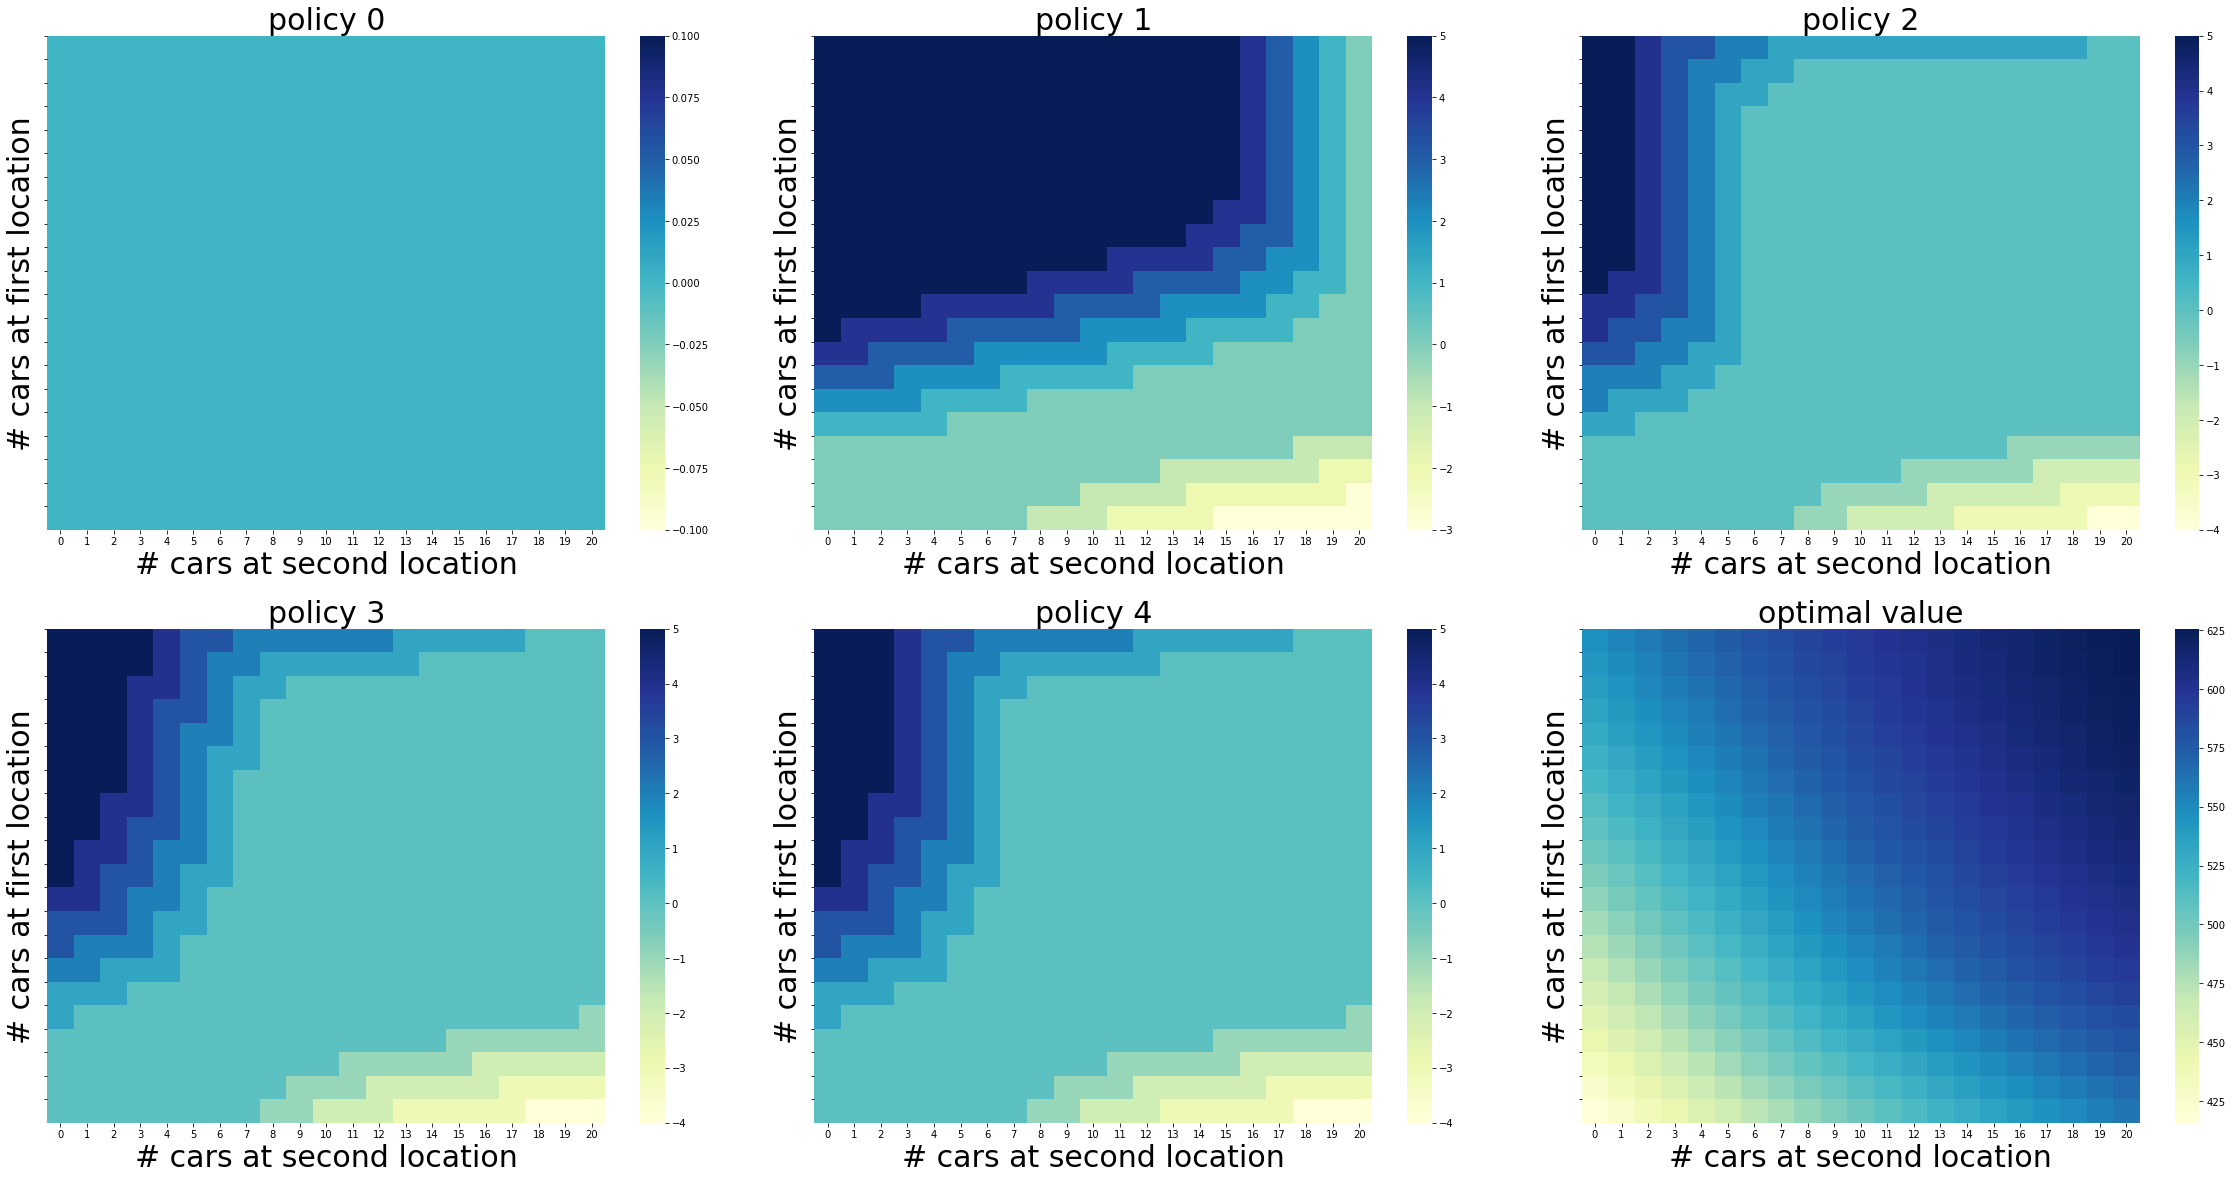

In [12]:
iterations = 0
_, axes = plt.subplots(2, 3, figsize=(40, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()
while True:
    fig = sns.heatmap(np.flipud(policy), cmap="YlGnBu", ax=axes[iterations])
    fig.set_ylabel('# cars at first location', fontsize=30)
    fig.set_yticks(list(reversed(range(max_cars + 1))))
    fig.set_xlabel('# cars at second location', fontsize=30)
    fig.set_title('policy {}'.format(iterations), fontsize=30)

    # policy evaluation (in-place)
    while True:
        old_value = value.copy()
        for i in range(max_cars + 1):
            for j in range(max_cars + 1):
                new_state_value = expected_return([i, j], policy[i, j], value, constant_returned_cars)
                value[i, j] = new_state_value
        max_value_change = abs(old_value - value).max()
        print('max value change {}'.format(max_value_change))
        if max_value_change < 1e-4:
            break

    # policy improvement
    policy_stable = True
    for i in range(max_cars + 1):
        for j in range(max_cars + 1):
            old_action = policy[i, j]
            action_returns = []
            for action in actions:
                if (0 <= action <= i) or (-j <= action <= 0):
                    action_returns.append(expected_return([i, j], action, value, constant_returned_cars))
                else:
                    action_returns.append(-np.inf)
            new_action = actions[np.argmax(action_returns)] #!
            policy[i, j] = new_action
            if policy_stable and old_action != new_action:
                policy_stable = False
    print('policy stable {}'.format(policy_stable))

    if policy_stable:
        fig = sns.heatmap(np.flipud(value), cmap="YlGnBu", ax=axes[-1])
        fig.set_ylabel('# cars at first location', fontsize=30)
        fig.set_yticks(list(reversed(range(max_cars + 1))))
        fig.set_xlabel('# cars at second location', fontsize=30)
        fig.set_title('optimal value', fontsize=30)
        break

    iterations += 1

---

# 3. Frozen Lake (programming exercise)

**Note:** In the exercises below, you are not given the complete implementations, but instead should try to solve the
exercises. The scaffold is in place and all you need to do is fill in the #TODO fields.
The solutions will be posted on Brightspace after the workgroups.

The Frozen Lake environment is a 4×4 grid which contain four possible areas  — Safe (S), Frozen (F), Hole (H) and Goal (G). The agent moves around the grid until it reaches the goal or the hole. The agent in the environment has four possible moves — Up, Down, Left and Right. If it falls into the hole, it has to start from the beginning and is rewarded the value 0.
The process continues until it learns from every mistake and reaches the goal. Here is a visual description of the Frozen Lake grid task:

![](https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/FrozenLake.png)

Note that the ice is slippery, so the agent won't always move in the direction intended by the action. Specifically, there is a 1/3 chance of moving in the direction prescribed by the action and 1/3 to each orthogonal direction.

In [13]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def run_episodes(environment, n_episodes, policy, display=True):
    wins = 0
    total_reward = 0
    for episode in range(n_episodes):
        terminated = False
        state = environment.reset()
        while not terminated:
            # Select an action to perform in a current state
            if policy == 'random':
                action = environment.action_space.sample()
            else:
                if isinstance(state, tuple):
                    state = state[0]
                action = np.argmax(policy[state])

            # Perform an action and observe how environment acted in response
            next_state, reward, terminated, truncated, info = environment.step(action)

            # Plot the first episode
            # if episode==1 and display:
            #         print("Action:")
            #         environment.render() # display current agent state
            # Summarize total reward
            total_reward += reward
            # Update current state
            state = next_state
            # Calculate number of wins over episodes
            if terminated and reward == 1.0:
                wins += 1
    average_reward = total_reward / n_episodes
    return wins, total_reward, average_reward

In [15]:
# Load a Frozen Lake environment
env = gym.make("FrozenLake-v1", map_name="4x4")
# Number of episodes to play
n_episodes = 5000
# First episode plotted as a sample episode
print('First episode:')
wins, total_reward, average_reward = run_episodes(env, n_episodes, policy="random")
print('------------------------------------')
print('Summary:')
print(f'- number of wins over {n_episodes} episodes = {wins}')
print(f'- average reward over {n_episodes} episodes = {average_reward}')

First episode:
------------------------------------
Summary:
- number of wins over 5000 episodes = 61
- average reward over 5000 episodes = 0.0122


## **a**) Implement the Iterative Policy Evaluation algorithm as a function to evaluate the given policy. How many iterations does the random policy need to converge?

#### **To-do**: complete the code that updates value in the following function

In [18]:
def policy_evaluation(policy, environment, discount_factor=1.0, theta=1e-9, max_iterations=1e9):
    # Number of evaluation iterations
    evaluation_iterations = 1
    # Initialize a value function for each state as zero
    V = np.zeros(environment.observation_space.n)
    # Repeat until change in value is below the threshold
    for i in range(int(max_iterations)):
        # Initialize a change of value function as zero
        delta = 0
        # Iterate though each state
        for state in range(environment.observation_space.n):
            # Initial a new value of current state
            v = 0
            # Try all possible actions which can be taken from this state
            for action, action_probability in enumerate(policy[state]):
                # Check how good next state will be
                for state_probability, next_state, reward, terminated in environment.P[state][action]:
                    # Calculate the expected value
                    # TODO complete the code below
                    v += state_probability*action_probability*(reward+discount_factor*V[next_state])

            # Calculate the absolute change of value function
            delta = max(delta, np.abs(V[state] - v))
            # Update value function
            V[state] = v
        evaluation_iterations += 1

        # Terminate if value change is insignificant
        if delta < theta:
            print(f'Policy evaluated in {evaluation_iterations} iterations.')
            return V

In [19]:
policy = {s: [1./env.action_space.n for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
policy_evaluation(policy=policy, environment=env)

Policy evaluated in 66 iterations.


/home/andrew/.local/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


array([0.01393979, 0.01163093, 0.02095298, 0.01047649, 0.01624866,
       0.        , 0.04075154, 0.        , 0.0348062 , 0.08816993,
       0.14205316, 0.        , 0.        , 0.17582037, 0.43929118,
       0.        ])

## **b**) Using your Policy Evaluation function from (a), implement the Policy iteration algorithm. Run the Policy iteration to obtain the optimal policy for the `FrozenLake-v1` environment.

In [20]:
def one_step_lookahead(environment, state, V, discount_factor):
    action_values = np.zeros(environment.action_space.n)
    for action in range(environment.action_space.n):
        for probability, next_state, reward, terminated in environment.P[state][action]:
            action_values[action] += probability * (reward + discount_factor * V[next_state])
    return action_values

### **To-do**: complete the code that chooses greedy actions (current action or improving policy) in the following function

In [ ]:
def policy_iteration(environment, discount_factor=1.0, max_iterations=1e9):
    # Start with a random policy
    #num states x num actions / num actions
    policy = {s: [1./env.action_space.n for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
    # Initialize counter of evaluated policies
    evaluated_policies = 1
    # Repeat until convergence or critical number of iterations reached
    for i in range(int(max_iterations)):
        stable_policy = True
        # Evaluate current policy
        V = policy_evaluation(policy, environment, discount_factor=discount_factor)
        # Go through each state and try to improve actions that were taken (policy Improvement)
        for state in range(environment.observation_space.n):
            # Choose the best action in a current state under current policy
            # # TODO complete the code below
            current_action = policy[state]
            # Look one step ahead and evaluate if current action is optimal
            # We will try every possible action in a current state
            action_value = one_step_lookahead(environment, state, V, discount_factor)
            # Select a better action
            # # TODO complete the code below
            best_action = 
            # If action didn't change
            if current_action != best_action:
                stable_policy = False
                # Greedy policy update
                policy[state] = np.eye(environment.action_space.n)[best_action]
        evaluated_policies += 1
        # If the algorithm converged and policy is not changing anymore, then return final policy and value function
        if stable_policy:
            # print(policy)
            return policy, V

In [ ]:
# Number of episodes to play
n_episodes = 1000
iteration_name = "Policy iteration"
iteration_func = policy_iteration
# Load a Frozen Lake environment
env = gym.make("FrozenLake-v1", map_name="4x4")
# Search for an optimal policy using policy iteration
policy, V = iteration_func(env)
# Apply the best policy to the real environment
wins, total_reward, average_reward = run_episodes(env, n_episodes, policy)
print(f'{iteration_name}: number of wins over {n_episodes} episodes = {wins}')
print(f'{iteration_name}: average reward over {n_episodes} episodes = {average_reward} \n\n')

### **c**) Implement the Value iteration algorithm. Run the algorithm to obtain the optimal policy for the `FrozenLake-v1` environment.

In [ ]:
def value_iteration(environment, discount_factor=1.0, theta=1e-9, max_iterations=1e9):
    # Initialize state-value function with zeros for each environment state
    V = np.zeros(environment.observation_space.n)
    for i in range(int(max_iterations)):
        # Early stopping condition
        delta = 0
        # Update each state
        for state in range(environment.observation_space.n):
            # Do a one-step lookahead to calculate state-action values
            action_value = one_step_lookahead(environment, state, V, discount_factor)
            # Select best action to perform based on the highest state-action value
            #  TODO complete the code below
            best_action_value =             
            # Calculate change in value
            delta = max(delta, np.abs(V[state] - best_action_value))
            # Update the value function for current state
            V[state] = best_action_value
            # Check if we can stop
        if delta < theta:
            print(f'Value-iteration converged at iteration #{i}.')
            break

    # Create a deterministic policy using the optimal value function
    # policy = np.zeros([environment.observation_space.n, environment.action_space.n])
    policy = {s: [0 for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
    for state in range(environment.observation_space.n):
        # One step lookahead to find the best action for this state
        action_value = one_step_lookahead(environment, state, V, discount_factor)
        # Select best action based on the highest state-action value
        # TODO complete the code below
        best_action = 
        # Update the policy to perform a better action at a current state
        policy[state][best_action] = 1.0
    return policy, V

In [ ]:
# Number of episodes to play
n_episodes = 1000
iteration_name = "Value iteration"
iteration_func = value_iteration
# Load a Frozen Lake environment
environment = gym.make('FrozenLake-v1')
# Search for an optimal policy using policy iteration
policy, V = iteration_func(environment)
# Apply the best policy to the real environment
wins, total_reward, average_reward = run_episodes(environment, n_episodes, policy)
print(f'{iteration_name}: number of wins over {n_episodes} episodes = {wins}')
print(f'{iteration_name}: average reward over {n_episodes} episodes = {average_reward} \n\n')

**d**) Compare two optimal policies in part (b) and (c). Which seems to converge faster and why?


In [ ]:
# Number of episodes to play
n_episodes = 5000
# Functions to find best policy
solvers = [('Policy Iteration', policy_iteration),
           ('Value Iteration', value_iteration)]
for iteration_name, iteration_func in solvers:
    # Load a Frozen Lake environment
    environment = gym.make("FrozenLake-v1", map_name="4x4")
    # Search for an optimal policy using policy iteration
    policy, V = iteration_func(environment.env)
    # Apply the best policy to the real environment
    wins, total_reward, average_reward = run_episodes(environment, n_episodes, policy, display=False)
    print(f'{iteration_name} :: number of wins over {n_episodes} episodes = {wins}')
    print(f'{iteration_name} :: average reward over {n_episodes} episodes = {average_reward} \n\n')

---
## 4. Grid world interactive demo

This third example, which you can use following [this link](https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html), implements the concepts of dynamic programming in an interactive way. The details of the demo are explained below. Explore the example and how different choices of rewards, discounting factors and policy improvement methods influence the results.

#### Brief description
<img alt="Grid world MDP" height="500" src="https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/GridWorldDemo.png" title="Grid World" width="500"/>

**State space**: This GridWorld has 10x10 = 100 distinct states. The start state is the top left cell. The gray cells are walls and cannot be moved to.
**Actions**: The agent can choose from up to 4 actions (left, right, down, up) to move around.
**Environment Dynamics**: GridWorld is deterministic, leading to the same new state given each state and action.
**Rewards**: The agent receives +1 reward when it is in the center square (the one that shows R 1.0), and -1 reward in a few states (R -1.0 is shown for these). The state with +1.0 reward is the goal state and resets the agent back to start.
The goal is to find an agent policy (shown here by arrows) that maximizes the future discounted reward. You can run the Policy Evaluation, Policy Improvement, and Value Iteration algorithms to see updates of state values.

*Note*: you can select any cell and change its reward with the Cell reward slider. For example, let Value iteration converge, then change the cell rewards and watch the policy adjustments.